## Sobre o Projeto 

** Empresa Ponto Máximo **

Teve como proposito demonstrar diferentes visões das vendas realizadas nos
últimos 4 anos (período de 2012 a 2015). Foi possível segmentar os relatórios de vendas
por diferentes informações e por diferentes ângulos. As informações foram suportadas 
pelas estratégias da empresa para o próximos anos. 

Foram realizadas diversas reuniões para definição da estratégia de vendas e as análises foram extraidas
sob demanda, foi programada um modelo de extração de gráficos que permitiram obter os dados de diferentes ângulos.

** Detalhes do Projeto ** 

* Importação do arquivo Csv para o jupyter notebook 
* Divisão de Colunas 
* Tratamento de dados: Verificação de dados nulos, remoção de dados nulos, remoção de dados duplicados, remoção de colunas não úteis. 

* Criação de novas colunas: Dia, Mês e Ano 
* Criação de Bancos de dados no Sqlite 
* Conexão com o Banco de dados
* Análise de dados com junção de tabelas: INNER JOIN, valores de agrupamento 
* Formato padrão para Dollar nos cálculos totais do dataset 
* Criação de Gráficos para analisar os dados da empresa Ponto Máximo 

** Principais Análises da Empresa Ponto Máximo ** 

* Total e Média de vendas da Empresa Ponto Máximo 
* Total de Vendas por Categoria 
* Total e Média de vendas por Segmento
* Total e Média de vendas por Fabricante e Vendedores 
* Total e Media de Vendas por Ano 
* Análise da quantidade de fabricas na empresa Ponto Máximo

## Importando as Bibliotecas 

In [768]:
import pandas as pd 
import locale
import numpy as np 
import sqlite3 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from matplotlib import cm

## Lendo o Dataset de Vendas

In [647]:
vendas = pd.read_excel("Vendas.xlsx")
vendas

,IDProduto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,IDVendedor,DataVenda,ValorVenda
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89
...,...,...,...,...,...,...,...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-09-23,1234.00
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-10-24,1234.00
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola,R1295,Rio de Janeiro,Rio de Janeiro,Aline Sutter,1008,2015-11-25,1230.00
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,R1295,Rio de Janeiro,Rio de Janeiro,André Pereira,1002,2015-11-26,1234.00


## Separação de Colunas para a surgir a Tabela de Dim_Loja

In [648]:
dim_loja = pd.read_excel("Vendas.xlsx", usecols="F, G, H") 

dim_loja

,Loja,Cidade,Estado
0,SP8821,São Paulo,São Paulo
1,SP8821,São Paulo,São Paulo
2,SP8821,São Paulo,São Paulo
3,SP8821,São Paulo,São Paulo
4,SP8821,São Paulo,São Paulo
...,...,...,...
452,R1295,Rio de Janeiro,Rio de Janeiro
453,R1295,Rio de Janeiro,Rio de Janeiro
454,R1295,Rio de Janeiro,Rio de Janeiro
455,R1295,Rio de Janeiro,Rio de Janeiro


## Tratamento de Dados - Dim_Loja

In [649]:
## Verificando Valores Faltantes
dim_loja.isna()

,Loja,Cidade,Estado
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
452,False,False,False
453,False,False,False
454,False,False,False
455,False,False,False


In [650]:
## Verificando se existe dados nulos na Tabela Dim_Loja 
dim_loja.isnull().sum()

Loja      0
Cidade    0
Estado    0
dtype: int64

In [651]:
## Verificando se existe dados duplicados na Tabela Dim_Loja 
dim_loja.duplicated()

0      False
1       True
2       True
3       True
4       True
       ...  
452     True
453     True
454     True
455     True
456     True
Length: 457, dtype: bool

In [652]:
## Removendo dados duplicados na Tabela Dim_Loja 
dim_loja = dim_loja.drop_duplicates()
dim_loja_count = dim_loja.count()[0]

dim_loja_count

14

In [653]:
## Contagem de Lojas 
pd.DataFrame({"Total de Lojas" : [dim_loja_count]})

,Total de Lojas
0,14


## Separação de Colunas para a parte de Dim_Produto

In [654]:
dim_produto = pd.read_excel("Vendas.xlsx", usecols="A, B, C, D, E")

dim_produto

,IDProduto,Produto,Categoria,Segmento,Fabricante
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux
...,...,...,...,...,...
452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola
455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp


## Tratamento de Dados - Dim_Produto 

In [655]:
## Verificando dados faltantes
dim_produto.isna().sum()

IDProduto     0
Produto       0
Categoria     0
Segmento      0
Fabricante    0
dtype: int64

In [656]:
## Verificando se existe dados nulos 
dim_produto.isnull().sum()

IDProduto     0
Produto       0
Categoria     0
Segmento      0
Fabricante    0
dtype: int64

In [657]:
## Informações da Tabela Dim_Produto

dim_produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IDProduto   457 non-null    object
 1   Produto     457 non-null    object
 2   Categoria   457 non-null    object
 3   Segmento    457 non-null    object
 4   Fabricante  457 non-null    object
dtypes: object(5)
memory usage: 18.0+ KB


## Separação de Colunas para a parte de Dim_Tempo 

In [658]:
dim_tempo = pd.read_excel("Vendas.xlsx", usecols="K")
dim_tempo

,DataVenda
0,2012-10-04
1,2012-01-01
2,2012-02-02
3,2012-03-03
4,2012-04-04
...,...
452,2015-09-23
453,2015-10-24
454,2015-11-25
455,2015-11-26


In [659]:
dim_tempo["Dia"] = pd.DatetimeIndex(dim_tempo["DataVenda"]).day
dim_tempo["Ano"] = pd.DatetimeIndex(dim_tempo["DataVenda"]).year
dim_tempo["Mês"] = pd.DatetimeIndex(dim_tempo["DataVenda"]).month

dim_tempo

,DataVenda,Dia,Ano,Mês
0,2012-10-04,4,2012,10
1,2012-01-01,1,2012,1
2,2012-02-02,2,2012,2
3,2012-03-03,3,2012,3
4,2012-04-04,4,2012,4
...,...,...,...,...
452,2015-09-23,23,2015,9
453,2015-10-24,24,2015,10
454,2015-11-25,25,2015,11
455,2015-11-26,26,2015,11


## Tratamento de Dados - Dim_Tempo

In [660]:
## Verificando valores faltantes 
dim_tempo.isna()

,DataVenda,Dia,Ano,Mês
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
452,False,False,False,False
453,False,False,False,False
454,False,False,False,False
455,False,False,False,False


In [661]:
## Verificando se existe dados nulos na tabela
dim_tempo.isnull().sum()

DataVenda    0
Dia          0
Ano          0
Mês          0
dtype: int64

In [662]:
## Verificando se obtém dados duplicados 
dim_tempo.duplicated().sum()

349

In [663]:
## Removendo dados duplicados 
dim_tempo = dim_tempo.drop_duplicates()
dim_count_tempo = dim_tempo.count()[0]

pd.DataFrame({"Total de Datas" : [dim_count_tempo]})

,Total de Datas
0,108


## Separação de Colunas para a parte de Dim_Vendas 

In [664]:
dim_vendas = pd.read_excel("Vendas.xlsx", usecols="J, I")

dim_vendas

,Vendedor,IDVendedor
0,Ana Teixeira,1009
1,Josias Silva,1006
2,Josias Silva,1006
3,Mateus Gonçalves,1003
4,Artur Moreira,1004
...,...,...
452,André Pereira,1002
453,André Pereira,1002
454,Aline Sutter,1008
455,André Pereira,1002


## Tratamento de Dados - Dim_Vendas

In [665]:
## Verificando Valores Faltantes 
dim_vendas.isna()

,Vendedor,IDVendedor
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
452,False,False
453,False,False
454,False,False
455,False,False


In [666]:
## Verificando se existe dados nulos na Tabela Dim_Vendas
dim_vendas.isnull().sum()

Vendedor      0
IDVendedor    0
dtype: int64

In [667]:
## Verificandos dados duplicados
dim_vendas.duplicated()

0      False
1      False
2       True
3      False
4      False
       ...  
452     True
453     True
454     True
455     True
456     True
Length: 457, dtype: bool

In [668]:
## Remoção de Dados duplicados 
dim_vendas = dim_vendas.drop_duplicates()
dim_count_vendas = dim_vendas.count()[0]

dim_count_vendas

9

In [669]:
## Registrando em um dataframe a contagem de vendedores
pd.DataFrame({"Total de Vendedores" : [dim_count_vendas]})

,Total de Vendedores
0,9


## Separação de Colunas para a parte de Tb_Fato 

In [670]:
tb_fato = pd.read_excel("Vendas.xlsx", usecols="A, F, J, K, L")

tb_fato

,IDProduto,Loja,IDVendedor,DataVenda,ValorVenda
0,SKU-0000001,SP8821,1009,2012-10-04,679.00
1,SKU-0000002,SP8821,1006,2012-01-01,832.00
2,SKU-0000003,SP8821,1006,2012-02-02,790.00
3,SKU-0000004,SP8821,1003,2012-03-03,765.32
4,SKU-0000005,SP8821,1004,2012-04-04,459.89
...,...,...,...,...,...
452,SKU-0000453,R1295,1002,2015-09-23,1234.00
453,SKU-0000454,R1295,1002,2015-10-24,1234.00
454,SKU-0000455,R1295,1008,2015-11-25,1230.00
455,SKU-0000456,R1295,1002,2015-11-26,1234.00


# Conversão de Dia, Mês e Ano

In [671]:
tb_fato["Dia"] = pd.DatetimeIndex(tb_fato["DataVenda"]).day
tb_fato["Ano"] = pd.DatetimeIndex(tb_fato["DataVenda"]).year
tb_fato["Mês"] = pd.DatetimeIndex(tb_fato["DataVenda"]).month

tb_fato

,IDProduto,Loja,IDVendedor,DataVenda,ValorVenda,Dia,Ano,Mês
0,SKU-0000001,SP8821,1009,2012-10-04,679.00,4,2012,10
1,SKU-0000002,SP8821,1006,2012-01-01,832.00,1,2012,1
2,SKU-0000003,SP8821,1006,2012-02-02,790.00,2,2012,2
3,SKU-0000004,SP8821,1003,2012-03-03,765.32,3,2012,3
4,SKU-0000005,SP8821,1004,2012-04-04,459.89,4,2012,4
...,...,...,...,...,...,...,...,...
452,SKU-0000453,R1295,1002,2015-09-23,1234.00,23,2015,9
453,SKU-0000454,R1295,1002,2015-10-24,1234.00,24,2015,10
454,SKU-0000455,R1295,1008,2015-11-25,1230.00,25,2015,11
455,SKU-0000456,R1295,1002,2015-11-26,1234.00,26,2015,11


In [672]:
## Verificando Valores Faltantes 
tb_fato.isna().sum()

IDProduto     0
Loja          0
IDVendedor    0
DataVenda     0
ValorVenda    0
Dia           0
Ano           0
Mês           0
dtype: int64

In [673]:
## Verificando se existe dados nulos na Tabela TB_Fato
tb_fato.isnull().sum()

IDProduto     0
Loja          0
IDVendedor    0
DataVenda     0
ValorVenda    0
Dia           0
Ano           0
Mês           0
dtype: int64

In [674]:
## Informações da Tabela Dim_Produto
tb_fato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IDProduto   457 non-null    object        
 1   Loja        457 non-null    object        
 2   IDVendedor  457 non-null    int64         
 3   DataVenda   457 non-null    datetime64[ns]
 4   ValorVenda  457 non-null    float64       
 5   Dia         457 non-null    int64         
 6   Ano         457 non-null    int64         
 7   Mês         457 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 28.7+ KB


In [675]:
## Estatística da Tabela Dim_Produto
tb_fato.describe()

,IDVendedor,ValorVenda,Dia,Ano,Mês
count,457.00,457.00,457.00,457.00,457.00
mean,1004.09,790.11,3.99,2014.07,6.50
std,2.46,755.54,5.68,1.04,3.47
min,1001.00,12.00,1.00,2012.00,1.00
25%,1002.00,167.00,2.00,2013.00,3.00
50%,1004.00,671.00,2.00,2014.00,6.00
75%,1006.00,1230.00,2.00,2015.00,10.00
max,1009.00,3999.00,27.00,2015.00,12.00


## Criando um Banco de Dados - Ponto Máximo 

In [676]:
conn = sqlite3.connect("ponto_maximo.db")

In [677]:
dim_loja.to_sql(name='lojas', con=conn)

In [678]:
dim_produto.to_sql(name='produtos', con=conn)

In [679]:
dim_tempo.to_sql(name='tempo', con=conn)

In [680]:
dim_vendas.to_sql(name='vendas', con=conn)

In [681]:
tb_fato.to_sql(name='fatos', con=conn)

## Verificando se a tabela foi criada no Banco de dados 

In [682]:
!sqlite3 ponto_maximo.db '.tables'

fatos     lojas     produtos  tempo     vendas  


## Informações das Tabelas do Banco de Dados

In [683]:
## Tabela Fatos
!sqlite3 ponto_maximo.db 'PRAGMA table_info(fatos)'

0|index|INTEGER|0||0
1|IDProduto|TEXT|0||0
2|Loja|TEXT|0||0
3|IDVendedor|INTEGER|0||0
4|DataVenda|TIMESTAMP|0||0
5|ValorVenda|REAL|0||0
6|Dia|INTEGER|0||0
7|Ano|INTEGER|0||0
8|Mês|INTEGER|0||0


In [684]:
## Tabela Lojas
!sqlite3 ponto_maximo.db 'PRAGMA table_info(lojas)'

0|index|INTEGER|0||0
1|Loja|TEXT|0||0
2|Cidade|TEXT|0||0
3|Estado|TEXT|0||0


In [685]:
## Tabela Produtos
!sqlite3 ponto_maximo.db 'PRAGMA table_info(produtos)'

0|index|INTEGER|0||0
1|IDProduto|TEXT|0||0
2|Produto|TEXT|0||0
3|Categoria|TEXT|0||0
4|Segmento|TEXT|0||0
5|Fabricante|TEXT|0||0


In [686]:
## Tabela Tempo 
!sqlite3 ponto_maximo.db 'PRAGMA table_info(tempo)'

0|index|INTEGER|0||0
1|DataVenda|TIMESTAMP|0||0
2|Dia|INTEGER|0||0
3|Ano|INTEGER|0||0
4|Mês|INTEGER|0||0


In [687]:
## Tabela Venda 
!sqlite3 ponto_maximo.db 'PRAGMA table_info(vendas)'

0|index|INTEGER|0||0
1|Vendedor|TEXT|0||0
2|IDVendedor|INTEGER|0||0


## Fazendo Consultas Básicas no Banco de Dados 

In [688]:
## Tabela Fatos 
data_fatos = pd.read_sql('SELECT * FROM fatos', con=conn)

data_fatos

,index,IDProduto,Loja,IDVendedor,DataVenda,ValorVenda,Dia,Ano,Mês
0,0,SKU-0000001,SP8821,1009,2012-10-04 00:00:00,679.00,4,2012,10
1,1,SKU-0000002,SP8821,1006,2012-01-01 00:00:00,832.00,1,2012,1
2,2,SKU-0000003,SP8821,1006,2012-02-02 00:00:00,790.00,2,2012,2
3,3,SKU-0000004,SP8821,1003,2012-03-03 00:00:00,765.32,3,2012,3
4,4,SKU-0000005,SP8821,1004,2012-04-04 00:00:00,459.89,4,2012,4
...,...,...,...,...,...,...,...,...,...
452,452,SKU-0000453,R1295,1002,2015-09-23 00:00:00,1234.00,23,2015,9
453,453,SKU-0000454,R1295,1002,2015-10-24 00:00:00,1234.00,24,2015,10
454,454,SKU-0000455,R1295,1008,2015-11-25 00:00:00,1230.00,25,2015,11
455,455,SKU-0000456,R1295,1002,2015-11-26 00:00:00,1234.00,26,2015,11


In [689]:
## Tabela Lojas 
data_lojas = pd.read_sql('SELECT * FROM lojas', con=conn)

data_lojas

,index,Loja,Cidade,Estado
0,0,SP8821,São Paulo,São Paulo
1,7,A9990,Belo Horizonte,Minas Gerais
2,32,SP8823,São Paulo,São Paulo
3,39,R1296,Rio de Janeiro,Rio de Janeiro
4,41,V7654,Vitória,Espírito Santo
5,87,P0761,Cascavel,Paraná
6,88,SA7761,Salvador,Bahia
7,103,SP8822,São Paulo,São Paulo
8,170,S6543,Osasco,São Paulo
9,173,B7659,Campinas,São Paulo


In [690]:
## Tabela Produtos
data_produtos = pd.read_sql('SELECT * FROM produtos', con = conn)

data_produtos

,index,IDProduto,Produto,Categoria,Segmento,Fabricante
0,0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG
1,1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
2,2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp
3,3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp
4,4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux
...,...,...,...,...,...,...
452,452,SKU-0000453,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
453,453,SKU-0000454,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp
454,454,SKU-0000455,Morotola Moto G5,Celulares,Doméstico,Motorola
455,455,SKU-0000456,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp


In [691]:
## Tabela Tempo
data_tempo = pd.read_sql('SELECT * FROM tempo', con = conn)

data_tempo

,index,DataVenda,Dia,Ano,Mês
0,0,2012-10-04 00:00:00,4,2012,10
1,1,2012-01-01 00:00:00,1,2012,1
2,2,2012-02-02 00:00:00,2,2012,2
3,3,2012-03-03 00:00:00,3,2012,3
4,4,2012-04-04 00:00:00,4,2012,4
...,...,...,...,...,...
103,302,2015-09-23 00:00:00,23,2015,9
104,303,2015-10-24 00:00:00,24,2015,10
105,304,2015-11-25 00:00:00,25,2015,11
106,305,2015-11-26 00:00:00,26,2015,11


In [692]:
## Tabela Vendas 
data_venda = pd.read_sql('SELECT * FROM vendas', con=conn)

data_venda

,index,Vendedor,IDVendedor
0,0,Ana Teixeira,1009
1,1,Josias Silva,1006
2,3,Mateus Gonçalves,1003
3,4,Artur Moreira,1004
4,5,Rodrigo Fagundes,1005
5,7,Fernando Zambrini,1007
6,9,André Pereira,1002
7,30,Maria Fernandes,1001
8,39,Aline Sutter,1008


## 1 - Informe o total e média de vendas da Empresa Ponto Máximo 

In [693]:
consulta1 = '''

SELECT SUM(ValorVenda) AS Total, AVG(ValorVenda) AS Média FROM fatos

'''

resultado1 = pd.read_sql(consulta1, conn)

resultado1

,Total,Média
0,361081.11,790.11


In [694]:
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

'en_US.UTF-8'

In [695]:
total = locale.currency(361081.11, grouping=True) 
print(" Total ", total)

 Total  $361,081.11


In [696]:
media = locale.currency(790.111838, grouping=True) 
print(" Média ", media)

 Média  $790.11


In [697]:
analise_geral = pd.DataFrame({"Total" : [total], 
                              "Média" : [media]}) 

analise_geral

,Total,Média
0,"$361,081.11",$790.11


## 2 - Informe o total e média de Vendas por Categoria 

In [698]:
consulta2 = '''

    SELECT Categoria, SUM(ValorVenda) AS Total, AVG(ValorVenda) AS Média
    FROM fatos f INNER JOIN produtos p 
    ON f.IDProduto = p.IDProduto GROUP BY p.Categoria
    
'''

resultado2 = pd.read_sql(consulta2, conn)

resultado2

,Categoria,Total,Média
0,Celulares,98932.00,2104.94
1,Eletrodomésticos,194764.11,861.79
2,Eletroportáteis,19055.45,153.67
3,Eletrônicos,48329.55,805.49


In [699]:
## Conversão para Dollar em Totais de Categorias

print("Total de Catégorias")

total_Categoria_Celulares = locale.currency(98932.00, grouping=True) 
print("Celulares: ", total_Categoria_Celulares) 

total_Categoria_Eletrodomésticos = locale.currency(194764.11, grouping=True) 
print("Eletrodomésticos: ", total_Categoria_Eletrodomésticos)

total_Categoria_Eletroportáteis = locale.currency(19055.45, grouping=True) 
print("Eletroportáteis: ", total_Categoria_Eletroportáteis)

total_Categoria_Eletrônicos = locale.currency(48329.55, grouping=True) 
print("Eletrônicos: ", total_Categoria_Eletrônicos)

print("\n")
print("Media de Catégorias")
## Conversão para Dollar em Médias de Categorias

Média_Categoria_Celulares = locale.currency(2104.936170, grouping=True) 
print("Celulares: ", Média_Categoria_Celulares) 

Média_Categoria_Eletrodomésticos = locale.currency(861.788097, grouping=True) 
print("Eletrodomésticos: ", Média_Categoria_Eletrodomésticos)

Média_Categoria_Eletroportáteis = locale.currency(153.672984, grouping=True) 
print("Eletroportáteis: ", Média_Categoria_Eletrodomésticos)

Média_Categoria_Eletrônicos = locale.currency(805.492500, grouping=True) 
print("Eletrônicos: ", Média_Categoria_Eletroportáteis)

Total de Catégorias
Celulares:  $98,932.00
Eletrodomésticos:  $194,764.11
Eletroportáteis:  $19,055.45
Eletrônicos:  $48,329.55


Media de Catégorias
Celulares:  $2,104.94
Eletrodomésticos:  $861.79
Eletroportáteis:  $861.79
Eletrônicos:  $153.67


In [700]:
analise_total = pd.DataFrame({"Total de Celulares" : [total_Categoria_Celulares], 
                              "Total de Eletrodomésticos:" : [total_Categoria_Eletrodomésticos], 
                              "Total de Eletroportáteis" : [total_Categoria_Eletroportáteis], 
                              "Total de Eletrônicos" : [total_Categoria_Eletrônicos]})

analise_total

,Total de Celulares,Total de Eletrodomésticos:,Total de Eletroportáteis,Total de Eletrônicos
0,"$98,932.00","$194,764.11","$19,055.45","$48,329.55"


In [701]:
analise_medio = pd.DataFrame({"Média de Celulares" : [Média_Categoria_Celulares], 
                              "Média de Eletrodomésticos" : [Média_Categoria_Eletrodomésticos], 
                              "Média de Eletroportáteis" : [Média_Categoria_Eletroportáteis], 
                              "Média de Eletrônicas" : [Média_Categoria_Eletrônicos]}) 

analise_medio

,Média de Celulares,Média de Eletrodomésticos,Média de Eletroportáteis,Média de Eletrônicas
0,"$2,104.94",$861.79,$153.67,$805.49


## 3 - Informe o total e média de vendas por Segmento 

In [702]:
consulta3 = '''
    
    SELECT p.Segmento AS Segmento, SUM(f.ValorVenda) AS Total, AVG(f.ValorVenda) AS Média 
    FROM fatos f INNER JOIN produtos p ON f.IDProduto = p.IDProduto GROUP BY p.Segmento 
    
'''

resultado3 = pd.read_sql(consulta3, conn)

resultado3

,Segmento,Total,Média
0,Corporativo,89952.65,2193.97
1,Doméstico,258573.46,638.45
2,Industrial,12555.00,1141.36


In [703]:
print("Total de Segmento")
print("\n")

total_Segmento_Corporativo = locale.currency(89952.65, grouping=True) 
print("Corporativo: ", total_Segmento_Corporativo) 

total_Segmento_Doméstico = locale.currency(258573.46, grouping=True) 
print("Doméstico: ", total_Segmento_Doméstico) 

total_Segmento_Industrial = locale.currency(12555.00, grouping=True) 
print("Industrial: ", total_Segmento_Industrial) 

analise_total = pd.DataFrame({"Total Corporativo" : [total_Segmento_Corporativo], 
                              "Total Doméstico" : [total_Segmento_Doméstico], 
                              "Total Industrial" : [total_Segmento_Industrial]})

analise_total

Total de Segmento


Corporativo:  $89,952.65
Doméstico:  $258,573.46
Industrial:  $12,555.00


,Total Corporativo,Total Doméstico,Total Industrial
0,"$89,952.65","$258,573.46","$12,555.00"


## 4 - Informe o total e média de vendas por Fabricante e Vendedores


In [704]:

consulta4 = '''
    
    SELECT p.Fabricante, v.Vendedor, SUM(f.ValorVenda) AS Total, 
    AVG(f.ValorVenda) AS Média FROM fatos f 
    INNER JOIN produtos p 
    ON f.IDProduto = p.IDProduto 
    INNER JOIN vendas v 
    ON f.IDVendedor = v.IDVendedor GROUP BY p.Fabricante, v.Vendedor
    
'''

resultado4 = pd.read_sql(consulta4, conn)

resultado4.head(60)

,Fabricante,Vendedor,Total,Média
0,Arno,Aline Sutter,139.00,139.00
1,Arno,Ana Teixeira,712.00,142.40
2,Arno,André Pereira,271.00,135.50
3,Arno,Artur Moreira,1360.00,136.00
4,Arno,Fernando Zambrini,650.00,130.00
5,Arno,Josias Silva,1044.00,130.50
6,Arno,Maria Fernandes,573.00,143.25
7,Arno,Mateus Gonçalves,799.00,133.17
8,Arno,Rodrigo Fagundes,1197.00,133.00
9,Brastemp,Ana Teixeira,8115.00,1159.29


## 5 - Total e Media de Vendas por Ano

In [733]:
consulta5 = '''
    
 SELECT Ano, SUM(ValorVenda) AS Total, AVG(ValorVenda) AS Média FROM fatos GROUP BY Ano
  
'''

resultado5 = pd.read_sql(consulta5, conn)

resultado5.head(65)

,Ano,Total,Média
0,2012,37503.74,961.63
1,2013,93418.56,812.34
2,2014,63322.02,822.36
3,2015,166836.79,738.22


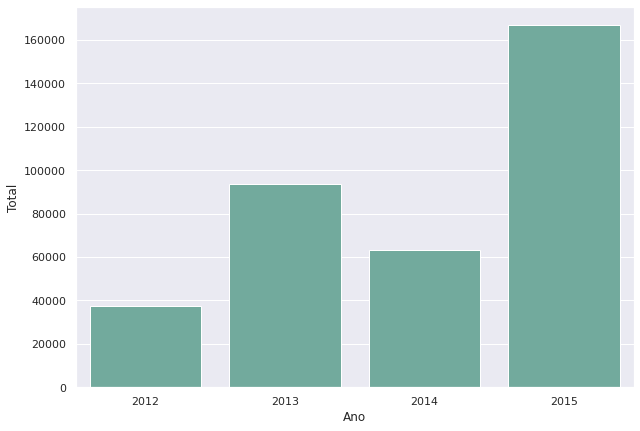

In [732]:
sns.set(style="darkgrid")

plt.figure(figsize=(10,7))

sns.barplot(
    
    x=resultado5["Ano"],
    y=resultado5["Total"], 
    data=resultado5,
    estimator=sum,
    ci=None,
    color='#69b3a2'
);

([<matplotlib.axis.XTick at 0x7f7eacacf8b0>,
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015')])

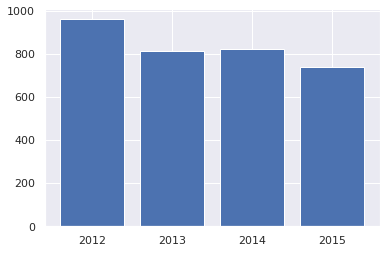

In [748]:
media = resultado5['Média']
bars = resultado5["Ano"] 

x_pos = np.arange(len(bars)) 

plt.bar(x_pos, media) 

plt.xticks(x_pos, bars)

In [751]:
consulta6 = '''
    
    SELECT Fabricante, COUNT(*) AS Quantidade FROM produtos GROUP BY Fabricante
'''

resultado6 = pd.read_sql(consulta6, conn)

resultado6

,Fabricante,Quantidade
0,Arno,50
1,Brastemp,94
2,Britânia,61
3,Consul,85
4,Dell,10
5,Electrolux,7
6,Epson,12
7,HP,38
8,LG,1
9,Motorola,29


## 6 - Análise a quantidade de fabricas na empresa Ponto Máximo

In [753]:
resultado6['percentual'] = (resultado6['Quantidade'] / resultado6['Quantidade'].sum()) * 100

display(resultado6)

,Fabricante,Quantidade,percentual
0,Arno,50,10.94
1,Brastemp,94,20.57
2,Britânia,61,13.35
3,Consul,85,18.60
4,Dell,10,2.19
5,Electrolux,7,1.53
6,Epson,12,2.63
7,HP,38,8.32
8,LG,1,0.22
9,Motorola,29,6.35


In [759]:
# Criação de um gráfico com apenas 4 fabricantes: 
# Os 3 Fabricantes com mais quantidades de localidade restante nos estados 

# Cria um dicionário vazio
outros = {}

# Filtra o percentual em 5% e soma o total 
outros['Quantidade'] = resultado6[resultado6['percentual'] < 5]['Quantidade'].sum()

# Grava o percentual 
outros['percentual'] = resultado6[resultado6['percentual'] < 5]['percentual'].sum()

# Ajusta o nome
outros['Fabricante'] = 'outros'

# Visualiza
outros

{'Quantidade': 44, 'percentual': 9.62800875273523, 'Fabricante': 'outros'}

In [761]:
# Filtra o dataframe de resultado 
resultado6 = resultado6[resultado6['percentual'] > 5] 

In [762]:
# Acrescentar com o dataframe de outros fabricantes
resultado6 = resultado6.append(outros, ignore_index = True) 

In [764]:
# Ordena o resultado 
resultado6 = resultado6.sort_values(by = 'Quantidade', ascending = False)

In [765]:
# Visualiza 
resultado6.head()

,Fabricante,Quantidade,percentual
1,Brastemp,94,20.57
3,Consul,85,18.60
2,Britânia,61,13.35
0,Arno,50,10.94
8,outros,44,9.63


In [766]:
# Ajusta os labels 
labels = [str(resultado6['Fabricante'][i])+' '+'['+str(round(resultado6['percentual'][i],2)) +'%'+']' for i in resultado6.index]

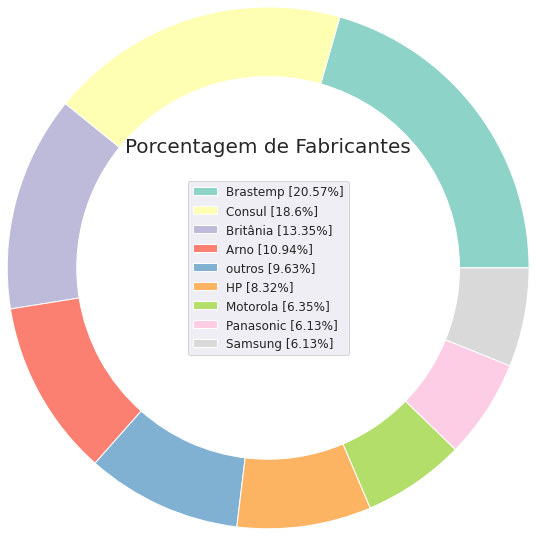

In [774]:
# Plot 

# Mapa de Cores 
cs = cm.Set3(np.arange(100))

# Cria a figura 
f = plt.figure()

# Pie Plot 
plt.pie(resultado6['Quantidade'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Porcentagem de Fabricantes", loc = 'center', fontdict ={'fontsize':20, 'fontweight':20})
plt.show()